**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: LUIS ANGEL SEDA MARCOS
*   MATRÍCULA: A01795301


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
path = os.getcwd()

air_df = pd.read_csv('LaqnData.csv')

In [26]:
air_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [27]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [28]:
air_df.Site.unique()

array(['CT3'], dtype=object)

In [29]:
air_df['Provisional or Ratified'].unique()

array(['R'], dtype=object)

In [30]:
air_df_drop_col = air_df.drop(['Site','Provisional or Ratified'], axis =1)
air_df_drop_col

,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3
...,...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0,ug m-3
43796,PM2.5,31/12/2017 20:00,6.0,ug m-3
43797,PM2.5,31/12/2017 21:00,5.0,ug m-3
43798,PM2.5,31/12/2017 22:00,5.0,ug m-3


In [31]:
air_df_drop_col.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [32]:
air_df_drop_col_units = air_df_drop_col.drop('Units', axis =1)
air_df_drop_col_units

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [33]:
air_df_drop_col_units['Species'].value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [34]:
air_df_species_values = air_df_drop_col_units.groupby("Species") ['Value'].mean()
air_df_species_values

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [35]:
air_df_drop_col_units

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


In [47]:
pvt_df = air_df_drop_col_units.pivot(values='Value', index=['ReadingDateTime'],
                       columns=['Species'])
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [37]:
pvt_df['NO2'].describe()

count    8660.000000
mean       38.010185
std        18.580841
min         2.800000
25%        23.800000
50%        35.300000
75%        49.900000
max       120.200000
Name: NO2, dtype: float64

In [38]:
rslt_df = pvt_df[pvt_df['NO2'] == 120.200000]
rslt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


In [39]:
pvt_df['PM10'].describe()

count    8657.000000
mean       22.551704
std        15.344755
min        -5.600000
25%        13.900000
50%        19.500000
75%        27.300000
max       633.099980
Name: PM10, dtype: float64

In [40]:
rslt_df = pvt_df[pvt_df['PM10'] == -5.600000]
rslt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


In [41]:
pvt_df['NO'].describe()

count    8660.000000
mean       15.045115
std        26.678565
min        -2.000000
25%         3.100000
50%         7.100000
75%        15.500000
max       401.799990
Name: NO, dtype: float64

In [42]:
pvt_df['PM2.5'].describe()

count    5933.000000
mean       14.999831
std        13.558588
min        -8.000000
25%         7.000000
50%        11.000000
75%        18.000000
max       128.000000
Name: PM2.5, dtype: float64

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

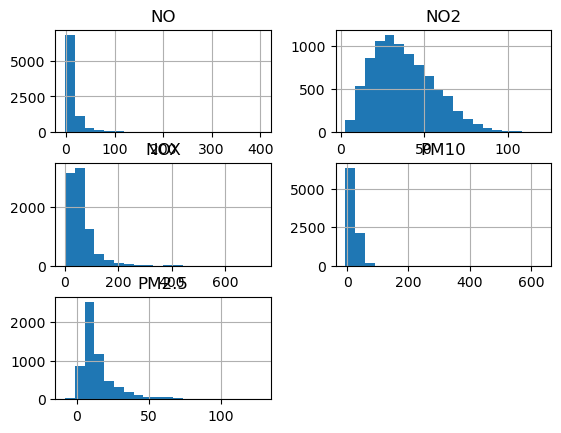

In [43]:
# Crear un histograma
pvt_df.hist(bins=20)
plt.show()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [44]:
#Separa la columna ReadingDateTime en fecha y tiempo
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#Toma las columnas de fecha y tiempo
datetime_df.columns = ['Date','Time']
#Imprime el df
datetime_df

#Separa la columna de fecha en año, mes y dia
date_df = datetime_df.Date.str.split('/',expand=True)
#toma las columnas de dias, mes y año
date_df.columns = ['Day','Month','Year']
#Imprime el df
date_df

#Realiza el join de air_df con el df de las fechas separadas y el df del tiempo 
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#Crea un idice compuestp de mes, dia, tiempo y especie
air_df = air_df.set_index(['Month','Day','Time','Species'])
#imprime el df
air_df

Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [45]:
air_df.unstack()

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

In [ ]:
##adding blank comment 